<h2 style='color:blue' align='center'>Implementation of Batch and Stochastic Gradient Descent in Python</h2>

__We will use very simple home prices data set to implement Batch and Stochastic Gradient Descent in Python. Batch Gradient Descent uses *all* training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties. In Stochastic GD, we randomly pick *one* training sample, perform forward pass, compute the error and immidiately adjust weights. So the key difference here is that to adjust weights Batch GD will use *all* training samples where as Stochastic GD will use one randomly picked training sample.__

In [22]:
# importing required modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

##### Load the dataset in pandas dataframe

In [64]:
# loading dataset in a DataFrame
df = pd.read_csv(".\Dataset\homeprices_banglore.csv")
print (df.shape, df.shape[0], df.shape[1])
df.sample(5)

(20, 3) 20 3


,area,bedrooms,price
19,800,1,32.0
11,2785,4,140.0
8,1310,3,50.0
6,2732,4,135.0
7,3300,4,155.0


##### Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them

In [3]:
# scaling will improve the performance of the model
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
 
scaled_X = sx.fit_transform(df.drop('price',axis='columns'))    # scaling X
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))    # scaling y

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

##### We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

In [28]:
print (scaled_y.shape)
scaled_y.reshape(20,)

(20, 1)


array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [30]:
print (scaled_y.reshape(20,).shape)

(20,)


##### Gradient descent allows you to find weights (w1, w2) and bias in following linear equation for housing price prediction

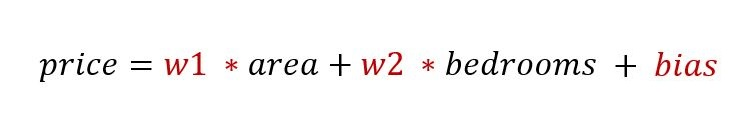

##### Now is the time to implement batch gradient descent. 

In [56]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedrooms)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b  # w1 * area + w2 * beadrooms + bias

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))   # derivatives
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)   # derivatives
        
        w = w - learning_rate * w_grad    # modified W values
        b = b - learning_rate * b_grad    # modified bias
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if (i % 10 == 0):    # keeping the traces of this cost values for later plotting a chart
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

###### Check price equation above. In that equation we were trying to find values of w1, w2 and bias. Here we got these values for each of them,
w1 = 0.70712464
w2 = 0.67456527
bias = -0.23034857438407427

###### Now plot epoch vs cost graph to see how cost reduces as number of epoch increases

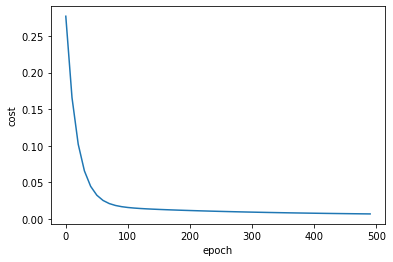

In [62]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)
plt.show()

###### Lets do some predictions now. 

In [58]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]   # as the scaled price has been scaled with 167 as max price and
                                                          # 32 as min price

predict(2600,4,w,b)

128.45484403267596

In [59]:
# as maximum price is 167 and minimum price is 32 in the price column in the DataFrame
# 0.5 is giving intermediate value
sy.inverse_transform([[1, 0, 0.5]])   

array([[167. ,  32. ,  99.5]])

In [60]:
predict(1000,2,w,b)

30.253094462442355

In [61]:
predict(1500,3,w,b)

69.47860785714694

<h3 style='color:purple'>(2) Stochastic Gradient Descent Implementation</h3>

#### Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropagate to adjust weights

In [44]:
# we will use random libary to pick random training sample.
import random
random.randint(0, 6) # randint gives random number between two numbers specified in the argument

1

In [45]:
def SGD(X, y_true, epochs, learning_rate = 0.01):    # SGD means Stochastic Gradient Descent
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedrooms)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0, total_samples - 1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2/total_samples)*(sample_y - y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if (i % 100 == 0): # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70971514, 0.6744729 ]), -0.22798115964835103, 0.002215477259479129)

Compare this with weights and bias that we got using gradient descent. They both of quite similar.

In [15]:
w , b 

(array([0.70712464, 0.67456527]), -0.23034857438407427)

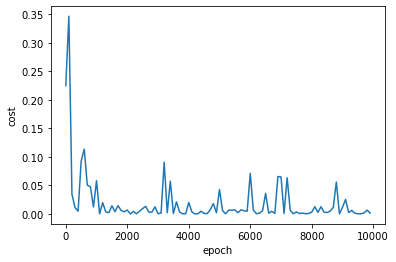

In [46]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)
plt.show()

In [17]:
predict(2600,4,w_sgd, b_sgd) 

128.44558811495924

In [18]:
predict(1000,2,w_sgd, b_sgd)

30.27671997503725

In [19]:
predict(1500,3,w_sgd, b_sgd)

69.49853446338963

<h3 style='color:purple'>Exercise</h3>

__Implement Mini Batch Gradient Descent in Python and plot cost vs epoch graph. Mini Batch is intermediate version of Batch GD and Stochastic GD. In Stochastic we used one randomly picked training sample, In Mini Gradient Descent we will use a batch of samples in each iteration. For example, if we have total 50 training samples, we can take a batch of 10 samples, calculate cumulative errors for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in Mini Batch, we do after every m sample (where m is batch size and it is 0 < m < n, where n is total number of samples).__

In [73]:
import random
index_list = []
while (len(index_list) != 5):
    value = random.randint(0, 19)
    if (value not in index_list): index_list.append(value)
print (index_list)

[17, 5, 2, 15, 14]
